In [1]:
from approximation import Approximator
import math
import numpy as np

In [2]:
apx = Approximator()

In [3]:
x = np.array(
    [0.231, 0.564, 0.896, 1.229, 1.561, 1.894, 2.227, 2.559, 2.892]
).astype(np.float64)

y = np.array(
    [-2.748, -2.932, -3.070, -3.391, -3.648, -3.737, -3.911, -4.249, - 4.506]
).astype(np.float64)

In [4]:
F = [
        lambda x, a, b, c: a*x**2 + b*x + c,
        lambda x, a, b, c: a/x**2 + b/x + c,
        lambda x, a, b, c: b*math.exp(a*x) + c,
        lambda x, a, b, c: b/(x+a) + c,
        lambda x, a, b, c: a*x + b*math.exp(-x) + c,
        lambda x, a, b, c: a/x + b*math.exp(-x) + c,
        lambda x, a, b, c: a*x*math.log(x) + b*math.exp(x) + c,
        lambda x, a, b, c: b*math.exp(-a*(x+c)**2) + c,
        lambda x, a, b, c: a*math.sqrt(x) + b*math.sin(x) + c
    ]

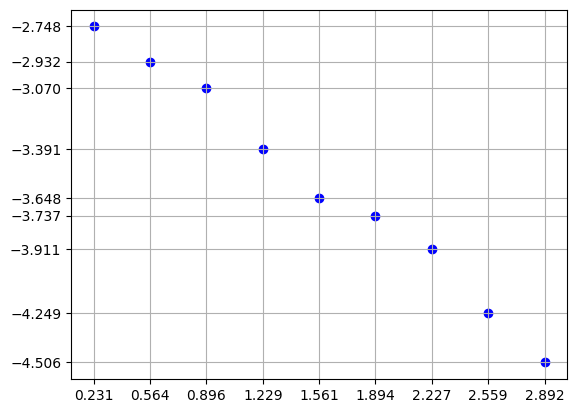

In [5]:
apx.show_points(x, y)

In [6]:
f1, f2 = F[-1], F[-3]

In [7]:
df1_da = [
    np.sum(x), 
    np.sum(np.sin(x)*np.sqrt(x)),
    np.sum(np.sqrt(x)),
    np.sum(y*np.sqrt(x))
]

df1_db = [
    np.sum(np.sqrt(x)*np.sin(x)),
    np.sum(np.sin(x)*np.sin(x)),
    np.sum(np.sin(x)),
    np.sum(y*np.sin(x)),
]

df1_dc = [
    np.sum(np.sqrt(x)),
    np.sum(np.sin(x)),
    len(x),
    np.sum(y)
]

In [8]:
df2_da = [
    np.sum(np.power(x, 2) * np.power(np.log(x), 2)),
    np.sum(np.exp(x)*x*np.log(x)),
    np.sum(x*np.log(x)),
    np.sum(y*x*np.log(x))
]

df2_db = [
    np.sum(x*np.log(x)*np.exp(x)),
    np.sum(np.exp(2*x)),
    np.sum(np.exp(x)),
    np.sum(y*np.exp(x))
]

df2_dc = [
    np.sum(x*np.log(x)),
    np.sum(np.exp(x)),
    len(x),
    np.sum(y)
]

In [9]:
system1 = np.array([df1_da, df1_db, df1_dc])
system2 = np.array([df2_da, df2_db, df2_dc])

In [10]:
r = lambda x: (round(v, 3) for v in x)

In [11]:
params1 = r(apx.rev_matrix(system1))
params2 = r(apx.rev_matrix(system2))
a1, b1, c1 = params1
a2, b2, c2 = params2

In [12]:

formatter = lambda x, label: f'a = {x[0]}, b = {x[1]}, c = {x[2]} (for {label})'

In [13]:
print(formatter((a1, b1, c1), 'function № 10'))
print(formatter((a2, b2, c2), 'function № 8'))

a = -1.483, b = 0.383, c = -2.069 (for function № 10)
a = -0.701, b = 0.051, c = -3.243 (for function № 8)


In [14]:
f1_view = f'{a1}*sqrt(x) + {b1}*sin(x) + {c1}'
f2_view = f'{a2}*x*ln(x) + {b2}*e^x + {c2}'
print(f1_view)
print(f2_view)

-1.483*sqrt(x) + 0.383*sin(x) + -2.069
-0.701*x*ln(x) + 0.051*e^x + -3.243


In [15]:
print(f'Невязка для функции 1: delta = {apx.get_delta(f1, a1, b1, c1, x, y)}')
print(f'Невязка для функции 2: delta = {apx.get_delta(f2, a2, b2, c2, x, y)}')

Невязка для функции 1: delta = 0.18518182392239568
Невязка для функции 2: delta = 0.31310985216231585


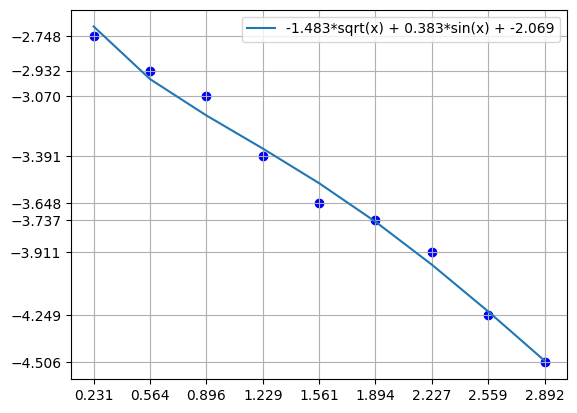

In [16]:
apx.show_func_with_point(f1, f1_view, a1, b1, c1, x, y)